In [ ]:
#!pip install fbprophet
from fbprophet import Prophet

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/gold_list.csv')

In [ ]:
data.head()

,Unnamed: 0,Dates,Price
0,0,01-01-2011,"1,961"
1,1,02-01-2011,"1,961"
2,2,03-01-2011,"1,960"
3,3,04-01-2011,"1,957"
4,4,05-01-2011,"1,991"


In [ ]:
data.columns

Index(['Unnamed: 0', 'Dates', 'Price'], dtype='object')

In [ ]:
del data['Unnamed: 0']

data['Price']=data['Price'].str.replace(',','')



In [ ]:
data

,Dates,Price
0,01-01-2011,1961
1,02-01-2011,1961
2,03-01-2011,1960
3,04-01-2011,1957
4,05-01-2011,1991
...,...,...
3972,27-12-2021,4703
3973,28-12-2021,4703
3974,29-12-2021,4703
3975,30-12-2021,4758


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Dates   3977 non-null   object
 1   Price   3977 non-null   object
dtypes: object(2)
memory usage: 62.3+ KB


In [ ]:
data.tail()

,ds,y
3972,2021-12-27,"4,703"
3973,2021-12-28,"4,703"
3974,2021-12-29,"4,703"
3975,2021-12-30,"4,758"
3976,2021-12-31,"4,760"


In [ ]:
data['Dates'] = pd.to_datetime(data['Dates'])
data

,Dates,Price
0,2011-01-01,1961
1,2011-02-01,1961
2,2011-03-01,1960
3,2011-04-01,1957
4,2011-05-01,1991
...,...,...
3972,2021-12-27,4703
3973,2021-12-28,4703
3974,2021-12-29,4703
3975,2021-12-30,4758


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


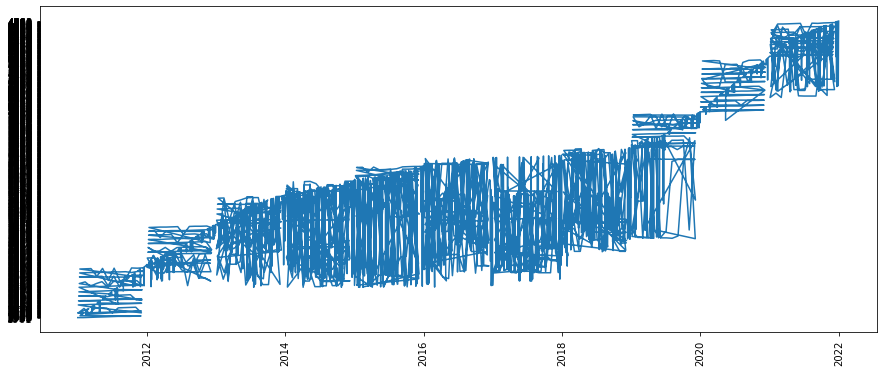

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['Dates'],data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
model = Prophet()
data.columns = ['ds','y']

In [ ]:
data

,ds,y
0,2011-01-01,1961
1,2011-02-01,1961
2,2011-03-01,1960
3,2011-04-01,1957
4,2011-05-01,1991
...,...,...
3972,2021-12-27,4703
3973,2021-12-28,4703
3974,2021-12-29,4703
3975,2021-12-30,4758


In [ ]:
model = model.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=1000,freq='D')
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4972,2024-09-22,6231.813813,4832.450804,7644.639296,4804.064519,7541.060486,41.557656,41.557656,41.557656,1.938718,1.938718,1.938718,39.618937,39.618937,39.618937,0.0,0.0,0.0,6273.371469
4973,2024-09-23,6232.988921,4855.736791,7643.468493,4803.935030,7544.360773,40.699722,40.699722,40.699722,1.459762,1.459762,1.459762,39.239960,39.239960,39.239960,0.0,0.0,0.0,6273.688643
4974,2024-09-24,6234.164030,4852.085890,7643.452973,4803.805541,7548.181903,39.796047,39.796047,39.796047,1.455456,1.455456,1.455456,38.340591,38.340591,38.340591,0.0,0.0,0.0,6273.960076
4975,2024-09-25,6235.339138,4860.848375,7640.860926,4803.330076,7551.887293,33.825790,33.825790,33.825790,-3.118044,-3.118044,-3.118044,36.943834,36.943834,36.943834,0.0,0.0,0.0,6269.164928
4976,2024-09-26,6236.514247,4821.688694,7576.102709,4802.475159,7555.201846,31.618744,31.618744,31.618744,-3.462999,-3.462999,-3.462999,35.081743,35.081743,35.081743,0.0,0.0,0.0,6268.132991


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [ ]:
plot_components_plotly(model, forecast)